# Study the training with M of a single qtrit gate by a SLM phase only with dimension N

#### Study of single qdit inference gate
By Claudio
Initial version 31 Agoust 2019, single input training with clipping of real and imaginary part


In [1]:
import sys
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
from utilitiesquantumgates import quantumgates 
from utilitiesquantumgates import quantumgatesinference 
from utilitiesquantumgates import SLM
from utilitiesquantumgates import utilities
from tensorboardutilities import tensorboardutilities
from datetime import datetime
#%% datatypes
npdatatype=np.complex64
tfdatatype=tf.complex64
tfrealdatatype=tf.float32 # to use double switch aboe to complex128

In [3]:
N=3 # reduced dimensions
M=15 # embedding dimension

In [4]:
X_np=quantumgates.Xgate(N,npdatatype)

In [5]:
# print("Single qdit gate X")
utilities.printonscreennp(X_np)    
        

+0.0+0.0i +1.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +1.0+0.0i 
+1.0+0.0i +0.0+0.0i +0.0+0.0i 


In [6]:
# Generate the random unitary matrix
U_np=quantumgates.randomU(M,npdatatype)  
#utilities.printonscreennp(U_np)    


This code run with version of tensorflow 1.15 (pip install tensorflow==1.15) Current version of TF is

In [7]:
print(tf.__version__)

1.15.0


# Test training for N=3 and M=5

In [8]:
out, Sin, Tfinal, Tinitial=SLM.trainSLMsingleinputquantized(X_np,U_np,verbose=3, epochs=10000,display_steps=500,
                                                                     realMIN=-3.15, realMAX=3.15, 
                                                                    imagMIN=0.0, imagMAX=0.0,quantizedbits=2)                                                                 

Random seed = 1585911993


Tensor("Const:0", shape=(15, 15), dtype=complex64)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Running with M 15 N 3 ntrain 1 nvalid 1




epoch 0
cost 13.049332618713379
valid cost 13.049332618713379
epoch 500
cost 0.09591914713382721
valid cost 0.09591914713382721
epoch 1000
cost 0.0213316660374403
valid cost 0.0213316660374403
epoch 1500
cost 0.019629258662462234
valid cost 0.019629258662462234
epoch 2000
cost 0.02542402409017086
valid cost 0.02542402409017086
epoch 2500
cost 0.02500000409781933
valid cost 0.02500000409781933
epoch 3000
cost 0.026502763852477074
valid cost 0.026502763852477074
epoch 3500
cost 0.027322955429553986
valid cost 0.027322955429553986
epoch 4000
cost 0.04233848676085472
valid cost 0.04233848676085472
epoch 4500
cost 0.024298472329974174
valid cost 0.024298472329974174
epoch 5000
cost 0.034687288105487823
valid cost 0.034687288105487823
epoch 5500
cost 0.024467429146170616
va

In [9]:
print(out)

{'accuracy': 0.0001, 'epoch': 9999, 'ntrain': 1, 'nvalid': 1, 'N': 3, 'M': 15, 'X': array([[0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)}


In [10]:
# test the solution
#utilities.printonscreennp(Tinitial)

In [11]:
utilities.printonscreennp(Sin)

+0.5-0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i +1.0+0.0i -0.5+0.9i -0.5+0.9i -0.5+0.9i +0.5-0.9i -0.5-0.9i -0.5+0.9i -0.5+0.9i +0.5-0.9i -0.5+0.9i +0.5-0.9i 
-0.5+0.9i +0.5-0.9i -0.5+0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i +0.5+0.9i -1.0-0.0i +0.5-0.9i +1.0+0.0i +0.5+0.9i -0.5+0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i 
+0.5-0.9i +0.5-0.9i -0.5+0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i +0.5-0.9i -0.5+0.9i -0.5+0.9i -0.5+0.9i -0.5-0.9i -0.5+0.9i +0.5+0.9i +0.5-0.9i +0.5+0.9i 
+0.5-0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i +0.5+0.9i -0.5+0.9i +0.5-0.9i -1.0-0.0i -0.5+0.9i +0.5-0.9i +0.5+0.9i -1.0-0.0i -0.5+0.9i +0.5-0.9i -0.5+0.9i 
-1.0-0.0i -0.5+0.9i +0.5-0.9i +0.5+0.9i +0.5-0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i -0.5+0.9i -1.0-0.0i -0.5+0.9i +0.5+0.9i 
-0.5+0.9i +0.5-0.9i -0.5+0.9i -0.5+0.9i -1.0-0.0i +0.5-0.9i -0.5+0.9i +0.5-0.9i +0.5-0.9i +0.5+0.9i +0.5-0.9i -0.5+0.9i +0.5-0.9i +0.5+0.9i +0.5-0.9i 
-0.5+0.9i +0.5-0.9i +0.5-0.9i +0.5-0.9i -0.5-0.9i +0.5-0.9i -0.5+0.9i -0.5+0.9i +1.0+0.0i -0.5

In [12]:
utilities.printonscreennp(np.matmul(U_np,Sin))

-1.3+1.1i +0.6-1.2i -0.6+0.3i -0.2+0.9i -1.8-1.4i +0.8-0.6i -0.4-0.2i +1.2-1.0i +0.3+0.6i -0.6+1.3i +0.3-0.3i +1.1+0.4i +1.5+0.3i +0.1+0.5i +0.5-0.5i 
+0.4-0.2i +0.6-0.6i +0.2+0.8i -0.5+0.1i +0.3-0.3i +0.1-0.9i -1.0+0.3i +0.2+0.7i +0.7-0.9i +0.3+0.4i -1.9-0.2i +0.2+0.5i +0.3+0.3i +0.6-0.6i -0.2+0.5i 
+0.5+0.0i -0.3+0.9i +0.0-0.1i -1.5-0.4i -0.1+0.1i +0.2+0.3i +0.3+0.7i +0.1+0.2i -0.4-1.0i +0.2-1.4i +1.3+1.2i +0.6-0.0i +0.6-0.2i +0.5-1.3i -0.8+0.6i 
-1.4+0.9i +0.8+0.2i -0.3-0.1i +0.2-0.1i -0.3-1.0i +1.5+0.6i -0.5+0.9i +0.5-0.6i +0.8-0.7i -0.2-0.8i -0.4+0.4i -0.2+0.4i -0.9+0.4i +0.3+0.4i +0.1-0.5i 
-0.3-0.4i -0.3-0.4i +0.1+0.2i -0.2+0.7i -0.5+0.5i +0.2+0.3i -0.3-0.4i +0.3+0.5i +0.9-0.1i +0.6-0.0i +0.3+0.6i -0.2+0.0i +0.6+0.8i -1.0-1.1i -0.9-0.5i 
-0.0+0.3i -0.5+0.1i +0.1-0.8i +0.6-0.6i +0.2+1.3i +0.9+1.0i -0.5-0.7i -0.5-0.8i -0.9+0.9i -0.9+0.1i +0.6+0.3i +0.6-1.4i -0.9-0.8i +0.6+1.1i -0.3-0.4i 
-0.3+0.1i -1.3-0.5i +0.7-0.6i +0.3-0.1i -0.7-0.2i -0.8+0.2i +1.9-0.2i -0.1-1.6i -1.9+0.9i +0.4

In [13]:
utilities.printonscreennp(U_np)

-0.3-0.2i +0.1+0.0i +0.2-0.3i -0.3-0.1i +0.1-0.3i +0.4+0.2i +0.1+0.0i +0.2+0.1i -0.1+0.0i -0.0+0.2i +0.1+0.1i +0.0+0.0i +0.1+0.1i -0.1+0.3i -0.0-0.0i 
-0.3-0.1i -0.2+0.1i +0.2-0.1i -0.3+0.1i -0.1+0.1i -0.2-0.2i +0.2-0.1i -0.3+0.2i +0.2+0.3i -0.2-0.2i +0.2-0.1i -0.1-0.0i -0.2-0.2i +0.0-0.0i -0.2+0.2i 
-0.1-0.2i +0.2-0.1i -0.2-0.0i +0.2-0.2i -0.1+0.2i +0.2-0.1i -0.2+0.1i +0.0+0.4i +0.1-0.0i -0.1-0.2i -0.1+0.0i -0.1+0.0i +0.1+0.2i +0.1+0.1i -0.4+0.4i 
-0.0-0.1i +0.2+0.3i -0.5+0.1i -0.3+0.1i +0.2-0.1i -0.1+0.0i +0.2+0.2i -0.3+0.0i -0.0-0.1i +0.1-0.2i +0.1+0.2i -0.2+0.2i +0.1+0.3i +0.1-0.1i -0.0-0.1i 
-0.1-0.1i +0.3-0.1i -0.2-0.2i +0.2-0.1i -0.0+0.1i -0.2+0.1i +0.1-0.4i +0.1+0.0i -0.2+0.4i +0.1+0.1i +0.1+0.3i -0.1+0.0i -0.1-0.0i -0.1-0.2i +0.1+0.0i 
-0.3-0.2i -0.2+0.1i -0.1+0.2i +0.2+0.0i +0.2-0.1i -0.1-0.0i -0.1+0.1i -0.1+0.1i -0.2+0.1i +0.5+0.4i +0.1-0.2i +0.3-0.0i -0.1-0.0i -0.1-0.1i -0.1+0.3i 
-0.2-0.2i -0.0+0.1i +0.2+0.2i +0.0+0.0i +0.1+0.1i -0.3-0.3i -0.1-0.2i +0.2+0.1i +0.0+0.0i +0.1

In [14]:
utilities.printonscreennp(Tfinal)

-1.3+1.1i +0.6-1.2i -0.6+0.3i -0.2+0.9i -1.8-1.4i +0.8-0.6i -0.4-0.2i +1.2-1.0i +0.3+0.6i -0.6+1.3i +0.3-0.3i +1.1+0.4i +1.5+0.3i +0.1+0.5i +0.5-0.5i 
+0.4-0.2i +0.6-0.6i +0.2+0.8i -0.5+0.1i +0.3-0.3i +0.1-0.9i -1.0+0.3i +0.2+0.7i +0.7-0.9i +0.3+0.4i -1.9-0.2i +0.2+0.5i +0.3+0.3i +0.6-0.6i -0.2+0.5i 
+0.5+0.0i -0.3+0.9i +0.0-0.1i -1.5-0.4i -0.1+0.1i +0.2+0.3i +0.3+0.7i +0.1+0.2i -0.4-1.0i +0.2-1.4i +1.3+1.2i +0.6-0.0i +0.6-0.2i +0.5-1.3i -0.8+0.6i 
-1.4+0.9i +0.8+0.2i -0.3-0.1i +0.2-0.1i -0.3-1.0i +1.5+0.6i -0.5+0.9i +0.5-0.6i +0.8-0.7i -0.2-0.8i -0.4+0.4i -0.2+0.4i -0.9+0.4i +0.3+0.4i +0.1-0.5i 
-0.3-0.4i -0.3-0.4i +0.1+0.2i -0.2+0.7i -0.5+0.5i +0.2+0.3i -0.3-0.4i +0.3+0.5i +0.9-0.1i +0.6-0.0i +0.3+0.6i -0.2+0.0i +0.6+0.8i -1.0-1.1i -0.9-0.5i 
-0.0+0.3i -0.5+0.1i +0.1-0.8i +0.6-0.6i +0.2+1.3i +0.9+1.0i -0.5-0.7i -0.5-0.8i -0.9+0.9i -0.9+0.1i +0.6+0.3i +0.6-1.4i -0.9-0.8i +0.6+1.1i -0.3-0.4i 
-0.3+0.1i -1.3-0.5i +0.7-0.6i +0.3-0.1i -0.7-0.2i -0.8+0.2i +1.9-0.2i -0.1-1.6i -1.9+0.9i +0.4

In [15]:
%%javascript
require(
    ["base/js/dialog"], 
    function(dialog) {
        dialog.modal({

                title: 'Notebook Halted',
                body: 'This notebook is no longer running; the kernel has been halted. Close the browser tab, or, to continue working, restart the kernel.',
                buttons: {
                    'Kernel restart': { click: function(){ Jupyter.notebook.session.restart(); } }
                }
        });
    }
);
Jupyter.notebook.session.delete();

<IPython.core.display.Javascript object>

# Test training for N=3 and M=10 

In [16]:
out, _, Tfinal, _=quantumgatesinference.trainrandom(X_np,12,1)



Running with M 12 ntrain 100 nvalid 50
Convergence in validation reached at epoch 14


In [17]:
print(out)

{'accuracy': 0.0001, 'epoch': 14, 'ntrain': 100, 'nvalid': 50, 'N': 3, 'M': 12, 'X': array([[0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)}


In [18]:
Nepoch=out['epoch'];print(Nepoch)

14


In [19]:
utilities.printonscreennp(Tfinal)

+0.0-0.0i +1.0-0.0i +0.0-0.0i +0.0+0.0i -0.0-0.0i +0.0-0.0i -0.0+0.0i -0.0-0.0i +0.0+0.0i -0.0+0.0i -0.0+0.0i +0.0+0.0i 
+0.0-0.0i -0.0+0.0i +1.0-0.0i -0.0-0.0i +0.0+0.0i -0.0-0.0i +0.0+0.0i -0.0-0.0i +0.0-0.0i -0.0+0.0i +0.0+0.0i +0.0-0.0i 
+1.0+0.0i +0.0-0.0i -0.0+0.0i -0.0+0.0i +0.0-0.0i +0.0-0.0i -0.0-0.0i +0.0-0.0i -0.0-0.0i +0.0+0.0i +0.0-0.0i -0.0+0.0i 
+0.0-0.0i -0.0-0.0i -0.0+0.0i -0.0-0.2i +0.3+0.0i +0.2-0.3i +0.2-0.2i +0.2-0.2i -0.2+0.1i -0.3-0.3i +0.1-0.1i -0.6+0.1i 
-0.0+0.0i +0.0+0.0i +0.0-0.0i -0.3-0.4i -0.1+0.1i -0.0+0.3i +0.4-0.1i -0.1-0.2i +0.3+0.2i +0.3+0.1i +0.4+0.1i +0.0+0.2i 
-0.0-0.0i +0.0+0.0i -0.0+0.0i -0.2-0.1i -0.1+0.4i +0.0-0.2i -0.1+0.5i +0.2-0.4i +0.1-0.0i -0.2-0.2i -0.1-0.1i +0.3-0.0i 
+0.0-0.0i -0.0+0.0i +0.0-0.0i -0.1-0.2i +0.2+0.2i -0.2+0.4i -0.3-0.1i -0.2-0.3i -0.5-0.1i +0.2-0.1i -0.3-0.0i -0.0+0.1i 
+0.0+0.0i +0.0-0.0i +0.0+0.0i -0.0-0.5i +0.3-0.3i -0.1+0.1i -0.0+0.1i +0.1+0.3i -0.0+0.0i -0.2+0.0i +0.0-0.5i +0.2-0.2i 
-0.0-0.0i +0.0+0.0i -0.0+0.0i -0

# Scaling of needed epochs with respect to M =redo with more points

In [20]:
Mmin=3
Mmax=100
step=5
Ms=list()
Nepoch=list()
count=0
for im in range(Mmin,Mmax+1,5):
    Ms.append(im)
    out, _, _, _=quantumgatesinference.trainrandom(X_np,im,verbose=1,ntrain=300)
    Nepoch.append(out['epoch'])
    count=count+1
    

Running with M 3 ntrain 300 nvalid 50
Convergence in validation reached at epoch 2
Running with M 8 ntrain 300 nvalid 50
Convergence in validation reached at epoch 4
Running with M 13 ntrain 300 nvalid 50
Convergence in validation reached at epoch 4
Running with M 18 ntrain 300 nvalid 50
Convergence in validation reached at epoch 6
Running with M 23 ntrain 300 nvalid 50
Convergence in validation reached at epoch 6
Running with M 28 ntrain 300 nvalid 50
Convergence in validation reached at epoch 8
Running with M 33 ntrain 300 nvalid 50
Convergence in validation reached at epoch 8
Running with M 38 ntrain 300 nvalid 50
Convergence in validation reached at epoch 8
Running with M 43 ntrain 300 nvalid 50
Convergence in validation reached at epoch 10
Running with M 48 ntrain 300 nvalid 50
Convergence in validation reached at epoch 10
Running with M 53 ntrain 300 nvalid 50
Convergence in validation reached at epoch 12
Running with M 58 ntrain 300 nvalid 50
Convergence in validation reached at

C:\Users\nonli\Anaconda3\envs\tensorflow 1p15\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  """


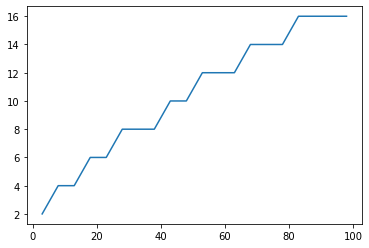

In [21]:
plt.plot(Ms,Nepoch)
plt.savefig('figurescaling.eps', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='eps',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [22]:
print(Nepoch)

[2, 4, 4, 6, 6, 8, 8, 8, 10, 10, 12, 12, 12, 14, 14, 14, 16, 16, 16, 16]


In [23]:
print(out)

{'accuracy': 0.0001, 'epoch': 16, 'ntrain': 300, 'nvalid': 50, 'N': 3, 'M': 98, 'X': array([[0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)}


In [24]:
print(Ms)

[3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98]


In [25]:
print(Nepoch)

[2, 4, 4, 6, 6, 8, 8, 8, 10, 10, 12, 12, 12, 14, 14, 14, 16, 16, 16, 16]
